In [ ]:
import bz2
import struct
with bz2.open('data/books_200M_uint32_equality_lookups_1M.bz2', 'rb') as f:
    text = f.read()



In [44]:
print(type(text))
print(len(text))

<class 'bytes'>
16000008


In [3]:
import bz2
import struct
with open('../../../osm_cellids_200M_uint64', 'rb') as f:
    text = f.read()

In [2]:
import numpy as np
l = np.arange(0,100,5)
len(l)

20

In [4]:
len(text)

1600000008

In [39]:
with open('../../../data/split_data/0', 'rb') as f:
    text = f.read()
len(text)

800000008

In [6]:
import random
import numpy as np
import torch

class random_search():

    def __init__(self):
        pass

    def set_seed(self,seed):

        torch.manual_seed(seed)
        np.random.seed(seed)
        os.environ['PYTHONHASHSEED'] = str(seed)
        if torch.cuda.is_available():
            torch.cuda.manual_seed_all(seed)


    def gauss_kernal(self,sample_scale,sigma):
        tempa = sample_scale.reshape(-1, 1) 
        tempb = np.transpose(tempa)
        temp = tempa - tempb
        gauss = math.exp(- temp**2 / (2 * sigma**2))
        return gauss

    def random_search(self,param_grid:dict,discrete = False):
        # self.set_seed(24) 


        sample_locate = []
        hyperparameters ={}

        if discrete == True:
            hyperparameters =  {k: random.sample(v,1)[0] for k,v in param_grid.items()}

        else:
            sigma = 0.2
            for key in param_grid.keys():
                sample_locate.append(np.linspace(param_grid[key][0],param_grid[key][-1], 1))
                v = np.random.normal(np.zeros(1),self.gauss_kernal(sample_locate[-1], sigma),1) 
                hyperparameters[key] = v
    
        return list(hyperparameters.values())


param_grid = {
            'external_expectedInsertFrac': list(np.arange(0,1,0.001)),
            'external_maxNodeSize_factor': list(range(20,30)),
            'external_approximateModelComputation': [0,1],
            'external_approximateCostComputation': [0,1],
            'external_fanoutSelectionMethod':[0],
            'external_splittingPolicyMethod':[0],
            'external_allowSplittingUpwards':[0],
            'external_kMinOutOfDomainKeys':list(range(2,500,1)),
            'external_kinterval':list(range(1000,5000,1)),
            'external_kOutOfDomainToleranceFactor':list(range(1,51)),
            'external_kMinDensity':list(np.arange(0,1,0.001)),
            'external_kDensityinterval_1':list(np.arange(0,0.5,0.001)),
            'external_kDensityinterval_2':list(np.arange(0,0.5,0.001)),
            "external_kAppendMostlyThreshold":list(np.arange(0,1,0.001))}

current_params = {}

search_model = random_search()
for key, value in param_grid.items():
        current_params[key] = random.choice(value)

params = search_model.random_search(param_grid=param_grid,discrete = True)
print(list(current_params.values()))
print(params)

[0.93, 25, 0, 0, 0, 0, 0, 297, 4287, 17, 0.89, 0.276, 0.29, 0.452]
[0.717, 22, 0, 1, 0, 0, 0, 304, 3080, 39, 0.86, 0.021, 0.244, 0.582]


In [28]:
def concatenate_data(arrays):
    result = []

    for i, arr in enumerate(arrays):
        if len(arr) == 0:
            continue

        if not result:
            result = arr
            continue

        current_min = result[-1]

        if arr[-1] < current_min:
            print(f"Warning: Dataset {i} has the largest value {arr[-1]} smaller than the current minimum value {current_min}. Skipping this dataset.")
            continue

        for val in arr:
            if val > current_min:
                result.append(val)
                current_min = val

    return result

In [30]:
arrays = [[1,2,3,5,7],[2,3,5,6,8],[1,2,10]]
print(concatenate_data(arrays))

[1, 2, 3, 5, 7, 8, 10]


In [18]:
a = np.array([2.2442,3.2424,4])
a[1] = a[1].clip(-1,0)
assert a[1] <=0

In [7]:
import numpy as np
a = np.int32(14)
assert type(a) == np.int32

In [ ]:
x = 4.55
x = np.s

In [40]:
text[0:200]

b"\x00\xc2\xeb\x0b\x00\x00\x00\x00u#\xe9\xdc\xb1\x1dv\x00oE\x96Zc\x18x\x00}?\xf6\xd2N\x9a}\x00\xdb\xa2\xcf\xdf{\xd9\x82\x00\xd1\xbc\xdate\xf7\x86\x00\xcb\x81\x91\r\x17\x8d\x8c\x00I\x0c\xfaI\x14\xe4\x8f\x00\xed\xae\xa3\x0fp\x8b\x92\x00+\xfc\x04\x80Ex\x95\x00'\xb8\xf1D%\x91\x95\x00\xc5\x91\xe3/\xcd\x97\x95\x00\xb1\x19MN\x8d\x99\x95\x00E\xb2\x875\n\xf0\x95\x00\xb9%\x00.+\x07\x96\x003I:L\xe3\x1f\x96\x003w\x17\x83\xfa\x1f\x96\x00\xd9\xb1RO\xfb\x1f\x96\x00\xd5\x01\x175\xfd\x1f\x96\x00\x03\xbaU#\x1c \x96\x00\xdf\xd0WU\x1e \x96\x00\x9bf\x81\xb4\x1f \x96\x00)\xee5\x879 \x96\x00\xcfC\x9d\xbc; \x96\x00O\xa7\xef\xa8I \x96\x00"

In [8]:
import torch
torch.sigmoid(torch.tensor(-50))

tensor(1.9287e-22)

In [24]:
text[0:100]
for i in range(10):
    print(text[i])

0
194
235
11
0
0
0
0
117
35


In [ ]:
num = struct.unpack('B', text)
num

In [6]:
a_dict = {'bse':1,'ss':2}
a_dict.values()


dict_values([1, 2])

In [27]:
# 源文件名
SOURCE = '../../../data/osm_cellids_200M_uint64'
# 切成多少个文件，奇数
N = 2
# 还原文件的路径
restore = '../../../data/restore_osm_cellids_200M_uint64'
import numpy

def rb(abs_path):
    """二进制方式读取文件"""
    # with open(abs_path, 'rb') as f:
        # return f.read()
    return numpy.fromfile(abs_path,dtype = "int64")


def wb(abs_path, s):
    """二进制方式写文件"""
    with open(abs_path, 'wb') as f:
        return f.write(s)
    # return s.tofile(abs_path,dtype = "int64")


def split():
    """文件切分"""
    frb = rb(SOURCE)
    each = int(len(frb) // N) + 1
    for i in range(N):
        wb("../../../data/split_data/"+str(i), frb[i * each: (i + 1) * each])


In [7]:
from gym import spaces
import numpy as np
kMaxLeafNodeSize = spaces.Discrete(10)  
kMaxLeafNodeSizeExternal = spaces.Discrete(10)  
# kAlgorithmThreshold = spaces.Box(low=1, high=np.iinfo(np.int32).max, shape=(1,), dtype=np.int32)

kAlgorithmThreshold_gap = spaces.Box(low=1, high=3e5, shape=(1,), dtype=np.int32)


kMemoryAccessTime = spaces.Box(low=1, high=5e2, shape=(1,), dtype=np.float64)
kLRRootTime = spaces.Box(low=1, high=5e2, shape=(1,), dtype=np.float64)
kPLRRootTime = spaces.Box(low=1, high=5e2, shape=(1,), dtype=np.float64)
kLRInnerTime_gap = spaces.Box(low=1, high=5e2, shape=(1,), dtype=np.float64)
kPLRInnerTime_gap = spaces.Box(low=1, high=5e2, shape=(1,), dtype=np.float64)
kHisInnerTime_gap = spaces.Box(low=1, high=5e2, shape=(1,), dtype=np.float64)
kBSInnerTime_gap = spaces.Box(low=1, high=5e2, shape=(1,), dtype=np.float64)
kCostMoveTime = spaces.Box(low=1, high=5e2, shape=(1,), dtype=np.float64)
kLeafBaseTime_gap = spaces.Box(low=1, high=5e2, shape=(1,), dtype=np.float64)
kCostBSTime = spaces.Box(low=1, high=5e2, shape=(1,), dtype=np.float64)


            # kMemoryAccessTime = spaces.Box(low=0, high=np.finfo(np.float64).max, shape=(1,), dtype=np.float64)
            # kLRRootTime = spaces.Box(low=0, high=np.finfo(np.float64).max, shape=(1,), dtype=np.float64)
            # kPLRRootTime = spaces.Box(low=0, high=np.finfo(np.float64).max, shape=(1,), dtype=np.float64)
            # kLRInnerTime = spaces.Box(low=0, high=np.finfo(np.float64).max, shape=(1,), dtype=np.float64)
            # kPLRInnerTime = spaces.Box(low=0, high=np.finfo(np.float64).max, shape=(1,), dtype=np.float64)
            # kHisInnerTime = spaces.Box(low=0, high=np.finfo(np.float64).max, shape=(1,), dtype=np.float64)
            # kBSInnerTime = spaces.Box(low=0, high=np.finfo(np.float64).max, shape=(1,), dtype=np.float64)
            # kCostMoveTime = spaces.Box(low=0, high=np.finfo(np.float64).max, shape=(1,), dtype=np.float64)
            # kLeafBaseTime = spaces.Box(low=0, high=np.finfo(np.float64).max, shape=(1,), dtype=np.float64)
            # kCostBSTime = spaces.Box(low=0, high=np.finfo(np.float64).max, shape=(1,), dtype=np.float64)

            # lambda_low = np.array([-1.0], dtype=np.float64)
            # lambda_high = np.array([100.0], dtype=np.float64)
            # external_lambda = spaces.Box(low=lambda_low, high=lambda_high, dtype=np.float64)
external_lambda_int = spaces.Discrete(2)  # Two possible values: 0 (representing -1) and 1 (representing a float)
external_lambda_float = spaces.Box(low=0.1, high=100.0, shape=(1,), dtype=np.float64)

action_space = spaces.Dict({
                'kMaxLeafNodeSize': kMaxLeafNodeSize,
                'kMaxLeafNodeSizeExternal': kMaxLeafNodeSizeExternal,
                'kAlgorithmThreshold': kAlgorithmThreshold_gap,
                'kMemoryAccessTime': kMemoryAccessTime,
                'kLRRootTime': kLRRootTime,
                'kPLRRootTime': kPLRRootTime,
                'kLRInnerTime': kLRInnerTime_gap,
                'kPLRInnerTime': kPLRInnerTime_gap ,
                'kHisInnerTime': kHisInnerTime_gap,
                'kBSInnerTime': kBSInnerTime_gap,
                'kCostMoveTime': kCostMoveTime,
                'kLeafBaseTime': kLeafBaseTime_gap,
                'kCostBSTime': kCostBSTime,
                'external_lambda_int': external_lambda_int,
                'external_lambda_float':external_lambda_float
            })


action = action_space.sample()

int(action['kAlgorithmThreshold'])
action

OrderedDict([('external_lambda_float', array([37.08861231])),
             ('external_lambda_int', 1),
             ('kAlgorithmThreshold', array([89831], dtype=int32)),
             ('kBSInnerTime', array([151.69675845])),
             ('kCostBSTime', array([292.24268344])),
             ('kCostMoveTime', array([380.34385415])),
             ('kHisInnerTime', array([246.4685156])),
             ('kLRInnerTime', array([279.48410791])),
             ('kLRRootTime', array([187.5875092])),
             ('kLeafBaseTime', array([174.89398657])),
             ('kMaxLeafNodeSize', 9),
             ('kMaxLeafNodeSizeExternal', 7),
             ('kMemoryAccessTime', array([451.53600481])),
             ('kPLRInnerTime', array([457.43364912])),
             ('kPLRRootTime', array([425.50715703]))])

In [1]:
# -*- coding: utf-8 -*- 
#按照大小分割文件
 
import os
 
filename = '../../../data/osm_cellids_200M_uint64'#需要进行分割的文件，请修改文件名
size = 629145600 #分割大小约128K
 
def mk_SubFile(srcName,sub,buf):
    [des_filename, extname] = os.path.splitext(srcName)
    filename  = des_filename + '_' + str(sub) + extname
    print( '生成子文件ing: %s' %filename)
    with open(filename,'wb') as fout:
        fout.write(buf)
        return sub+1
            
            
def split_By_size(filename,size):
    with open(filename,'rb') as fin:
        buf = fin.read(size)
        sub = 1
        while len(buf)>0:
            sub = mk_SubFile(filename,sub,buf)
            buf = fin.read(size)  
    print("ok")
            
 

split_By_size(filename, size)


生成子文件ing: ../../../data/osm_cellids_200M_uint64_1
生成子文件ing: ../../../data/osm_cellids_200M_uint64_2
生成子文件ing: ../../../data/osm_cellids_200M_uint64_3
ok


In [3]:
from gym import spaces
import numpy as np
action_space = spaces.Dict({
                                        "external_expectedInsertFrac": spaces.Box(0, 1, shape=(1,)),
                                        "external_maxNodeSize_factor": spaces.Discrete(10),
                                        "external_approximateModelComputation": spaces.Discrete(2),
                                        "external_approximateCostComputation":spaces.Discrete(2),
                                        "external_fanoutSelectionMethod":spaces.Discrete(2),
                                        "external_splittingPolicyMethod":spaces.Discrete(3),
                                        "external_allowSplittingUpwards":spaces.Discrete(2),
                                        "external_kMinOutOfDomainKeys":spaces.Discrete(100),
                                        "external_kinterval":spaces.Discrete(40),
                                        "external_kOutOfDomainToleranceFactor":spaces.Discrete(50),
                                        "external_kMinDensity":spaces.Box(0, 1, shape=(1,)),
                                        "external_kDensityinterval_1":spaces.Box(0, 1, shape=(1,)),
                                        "external_kDensityinterval_2":spaces.Box(0, 1, shape=(1,)),
                                        "external_kAppendMostlyThreshold":spaces.Box(0,1,shape=(1,))
                                        })

action = action_space.sample()
a = [k for k in action.values()]
a

[0,
 0,
 1,
 array([0.5587646], dtype=float32),
 0,
 array([0.12434611], dtype=float32),
 array([0.12843293], dtype=float32),
 array([0.3445383], dtype=float32),
 array([0.12400867], dtype=float32),
 2,
 15,
 36,
 6,
 0]

In [5]:
np.arange(0,0.5,0.001)

array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017,
       0.018, 0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026,
       0.027, 0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035,
       0.036, 0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044,
       0.045, 0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053,
       0.054, 0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062,
       0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071,
       0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 ,
       0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089,
       0.09 , 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098,
       0.099, 0.1  , 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107,
       0.108, 0.109, 0.11 , 0.111, 0.112, 0.113, 0.114, 0.115, 0.116,
       0.117, 0.118, 0.119, 0.12 , 0.121, 0.122, 0.123, 0.124, 0.125,
       0.126, 0.127,

In [3]:
import numpy as np
a  = [2,3,4]

1 << 24

b = np.asarray(a)
b

array([2, 3, 4])

In [8]:
for i in range(20,30,5):
    print(i)

20
25


In [5]:
import torch
a_torch = torch.FloatTensor(a)
a_torch = torch.sigmoid(a_torch)
a_torch[3]
if a_torch[2] == 0.5:
    print("yes")
    print(a_torch[2]+a_torch[1])

a_torch/2

tensor([0.2500, 0.2500, 0.3655, 0.3181, 0.2500, 0.2655, 0.2660, 0.2926, 0.2655,
        0.4404, 0.5000, 0.5000, 0.4988, 0.2500])

In [36]:
string_old = "hello 1"
string_old = string_old.replace("hello 1", "hello %0.1f"%a_torch[1])
string_old

'hello 0.5'

In [11]:
list = []
list.append(0)
type(list[0])

int

In [5]:
import numpy as np
action_list = np.zeros(len(a))
kinterval_list = np.arange(1000,5000,100)
external_kMinOutOfDomainKeys_list = np.arange(0,500,5)
len(kinterval_list)
len(external_kMinOutOfDomainKeys_list)

100

In [4]:
new_action = []
new_action.append("1<<%d"%2)
new_action
assert a[1] == 1 or a[1] == 0

['1<<2']

In [58]:

a = [0.5999,0.4]
np.savetxt("./parameters.txt",a, fmt = "%0.1f")

In [48]:
act = [12,'true']
with open("./parameters.txt","w") as f:        
    for line in act:
        f.write(str(line)+'\n')

In [11]:
import numpy as np
data = np.fromfile('../../../data/split_data/0/fb_200M_uint64_1',np.uint64)
print(len(data))


300001


In [9]:
import os
for i in range(30):
    os.mkdir('../../../data/split_data/%d'%i)
    print("finish creating the %d th data folder"%i)
    for k in range(30):
        os.system("cp ../../../data/split_data/fb_200M_uint64_%d ../../../data/split_data/%d/"%(k+i,i))

finish creating the 0 th data folder
finish creating the 1 th data folder
finish creating the 2 th data folder
finish creating the 3 th data folder
finish creating the 4 th data folder
finish creating the 5 th data folder
finish creating the 6 th data folder
finish creating the 7 th data folder
finish creating the 8 th data folder
finish creating the 9 th data folder
finish creating the 10 th data folder
finish creating the 11 th data folder
finish creating the 12 th data folder
finish creating the 13 th data folder
finish creating the 14 th data folder
finish creating the 15 th data folder
finish creating the 16 th data folder
finish creating the 17 th data folder
finish creating the 18 th data folder
finish creating the 19 th data folder
finish creating the 20 th data folder
finish creating the 21 th data folder
finish creating the 22 th data folder
finish creating the 23 th data folder
finish creating the 24 th data folder
finish creating the 25 th data folder
finish creating the 26

In [2]:
import numpy as np
data1 = np.fromfile('../../data_SOSD/concat_MIX_200M_uint64',np.uint64)
data2 = np.fromfile('../../data_SOSD/books_200M_uint64',np.uint64)
data3 = np.fromfile('../../data_SOSD/osm_cellids_200M_uint64',np.uint64)
data4 = np.fromfile('../../data_SOSD/fb_200M_uint64',np.uint64)
print(len(data1),len(data2))

201183372 200000001


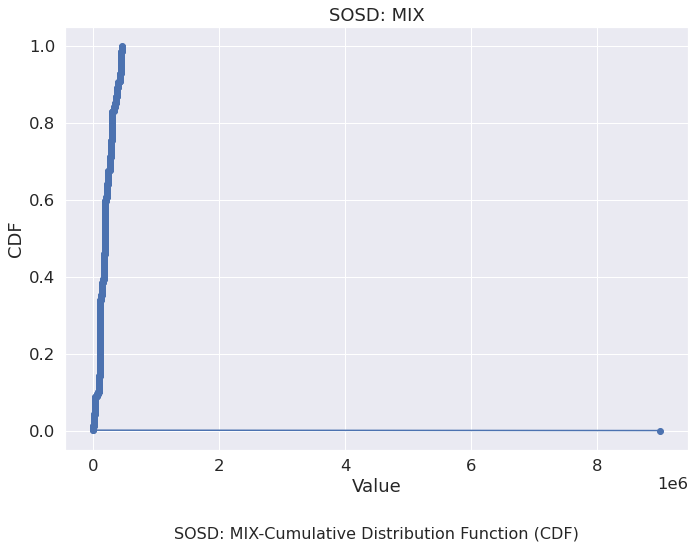

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data0=data0[0:1000]
# Set seaborn style and increase default font size
sns.set(font_scale=1.5)

# Plot the CDF
fig, ax = plt.subplots(figsize=(10, 8))

# Compute the CDF
y = np.arange(1, len(data0) + 1) / len(data0)

ax.plot(data0, y, marker='o', linestyle='-')
ax.set_title('SOSD: MIX', fontsize=18)  # Increase font size for title
ax.set_xlabel('Value')
ax.set_ylabel('CDF')
ax.grid(True)

# Add caption at the bottom
caption = 'SOSD: MIX-Cumulative Distribution Function (CDF)'
ax.annotate(caption, (0.5, -0.2), xycoords='axes fraction', ha='center', va='center', fontsize=16)

plt.tight_layout()

# Save the figure
plt.savefig("../../Plots/MIX.jpg", dpi=3000, bbox_inches='tight')

plt.show()



In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Compute the CDF
y = np.arange(1, len(data1) + 1) / len(data1)
sns.set()
# Plot the CDF
plt.figure(figsize=(8, 6))
plt.plot(data1, y, marker='o', linestyle='-')
plt.title('SOSD: MIX-Cumulative Distribution Function (CDF)')
plt.xlabel('Value')
plt.ylabel('CDF')
plt.grid(True)
plt.savefig("../../Plots/MIX.jpg",dpi=600)
plt.show()

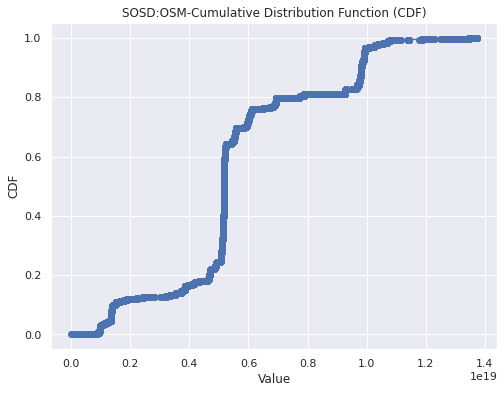

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the CDF
y = np.arange(1, len(data3) + 1) / len(data3)

# Plot the CDF
plt.figure(figsize=(8, 6))
plt.plot(data3, y, marker='o', linestyle='-')
plt.title('SOSD:OSM-Cumulative Distribution Function (CDF)')
plt.xlabel('Value')
plt.ylabel('CDF')
plt.grid(True)
plt.savefig("../../Plots/OSM.jpg")
plt.show()

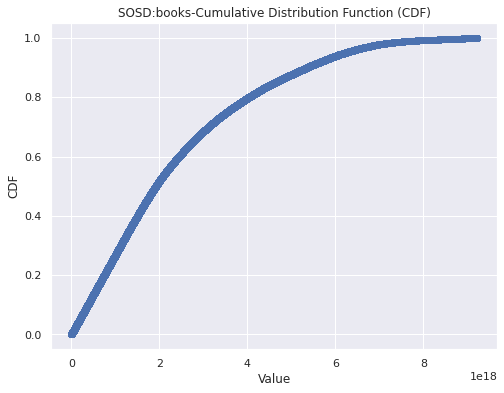

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the CDF
y = np.arange(1, len(data2) + 1) / len(data2)

# Plot the CDF
plt.figure(figsize=(8, 6))
plt.plot(data2, y, marker='o', linestyle='-')
plt.title('SOSD:books-Cumulative Distribution Function (CDF)')
plt.xlabel('Value')
plt.ylabel('CDF')
plt.grid(True)
plt.savefig("../../Plots/books.jpg")
plt.show()



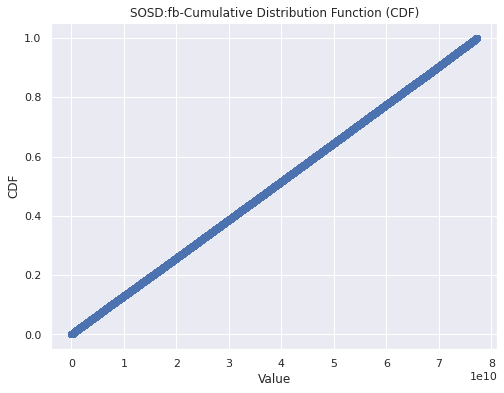

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
# Compute the CDF
data4 = data4[0:-30]
y = np.arange(1, len(data4) + 1) / len(data4)

# Plot the CDF
plt.figure(figsize=(8, 6))
plt.plot(data4, y, marker='o', linestyle='-')
plt.title('SOSD:fb-Cumulative Distribution Function (CDF)')
plt.xlabel('Value')
plt.ylabel('CDF')
plt.grid(True)
plt.savefig("../../Plots/fb.jpg")
plt.show()


In [3]:
data4 = data4[0:-30]
data1 = data1[::10000]
data2= data2[::10000]
data3 = data3[::10000]
data4 = data4[::10000]

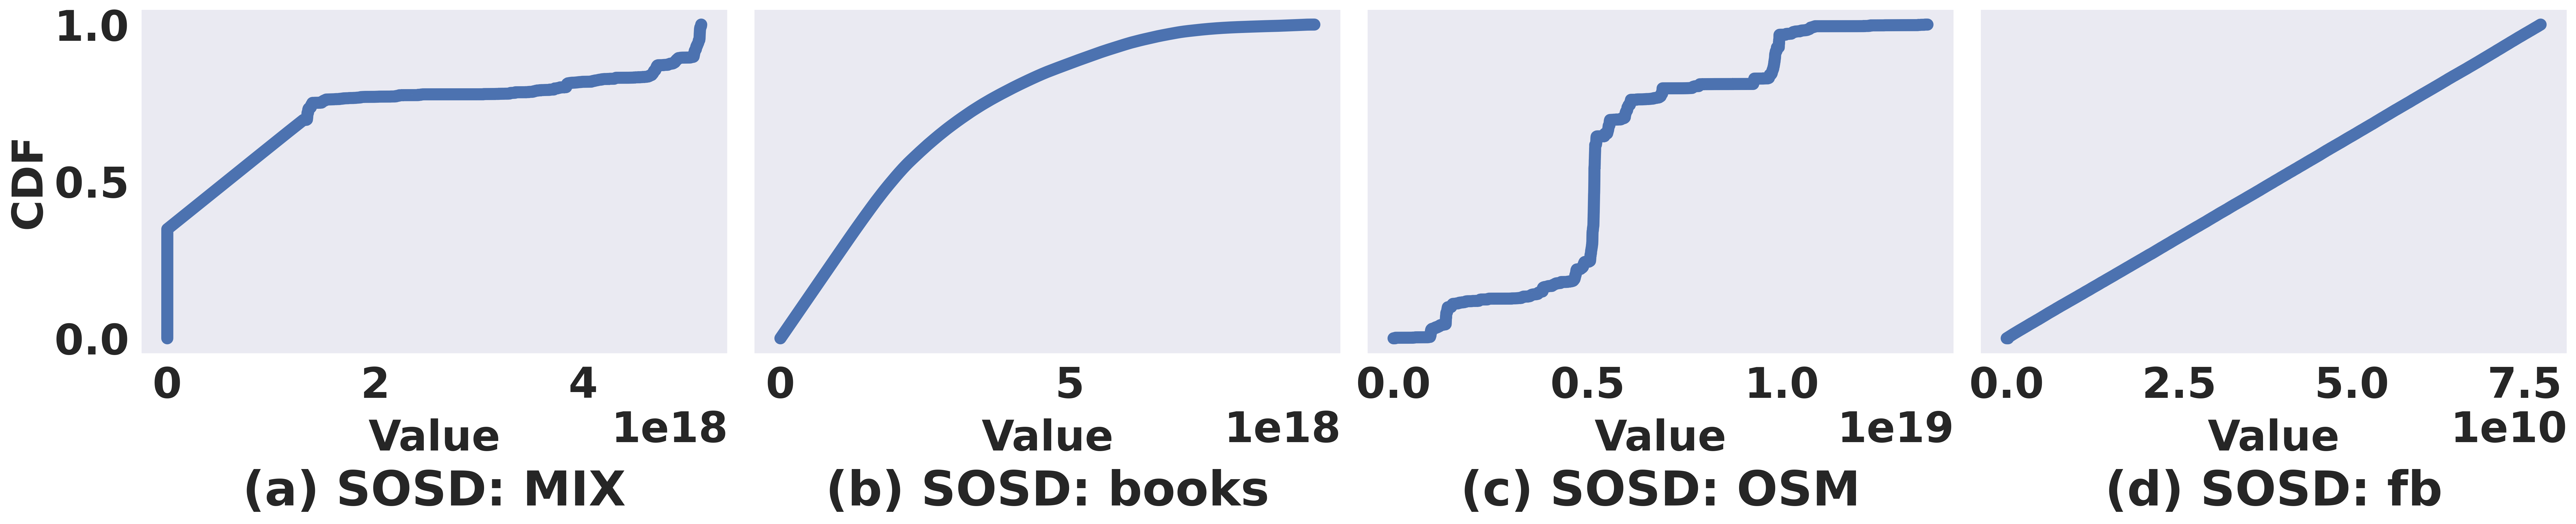

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style and font scale
sns.set(style='dark', font_scale=1.5)  # You may adjust the scale for larger fonts

# Ensure that all text is bold
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'

# If using LaTeX rendering, ensure bold text with:
plt.rcParams['text.latex.preamble'] = r'\usepackage{bm}' 

# Create a gridspec
# Create a figure
fig, axes = plt.subplots(1, 4, figsize=(30, 8), dpi=300, sharex=True, sharey=True)
gs = gridspec.GridSpec(1, 4)

data_list = [data1, data2, data3, data4]
titles = [
    '(a) SOSD: MIX',
    '(b) SOSD: books',
    '(c) SOSD: OSM',
    '(d) SOSD: fb'
]


ax = None  

for i, (data, title) in enumerate(zip(data_list, titles)):
    ax = plt.subplot(gs[i])  
    
    # Compute the CDF
    y = np.arange(1, len(data) + 1) / len(data)

    ax.plot(data, y, linestyle='-', linewidth=10)
    
    # Adjusting tick font size
    ax.tick_params(axis='x', labelsize=35)  
    ax.tick_params(axis='y', labelsize=35)  
    
    # Bolding tick labels for x-axis
    for label in ax.get_xticklabels():
        label.set_weight("bold")
    
    # Bolding tick labels for y-axis
    for label in ax.get_yticklabels():
        label.set_weight("bold")
    
    ax.set_xlabel('Value', fontsize=35, labelpad=10, weight='bold')  
    ax.xaxis.offsetText.set_fontsize(35)  
    
    if i == 0:  
        ax.set_ylabel('CDF', fontsize=35, weight='bold')
        ax.set_yticks(np.linspace(0, 1, 3))  
    else:
        ax.set_yticks([])  
    
    ax.annotate(title, (0.5, -0.4), xycoords='axes fraction', ha='center', va='center', fontsize=40, weight='bold')


plt.tight_layout(rect=[0, 0.1, 1, 1])

# Save the combined figure
combined_save_path = "../../Plots/combined_cdfs.pdf"
fig.savefig(combined_save_path, bbox_inches='tight', dpi=300)

plt.show()


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

# Set seaborn style and increase default font size
sns.set(font_scale=1.5)

# Create a gridspec
fig = plt.figure(figsize=(36, 8))  # Adjust the total figure size if needed
gs = gridspec.GridSpec(1, 4)

data_list = [data1, data2, data3, data4]
titles = [
    '(a) SOSD: MIX',
    '(b) SOSD: books',
    '(c) SOSD: OSM',
    '(d) SOSD: fb'
]

for i, (data, title) in enumerate(zip(data_list, titles)):
    ax = plt.subplot(gs[i])

    # Compute the CDF
    y = np.arange(1, len(data) + 1) / len(data)

    ax.plot(data, y, marker='o', linestyle='-')
    # ax.set_title(title, fontsize=18)  # Increase font size for title
    ax.set_xlabel('Value')
    ax.set_ylabel('CDF')
    ax.grid(True)

    # Add caption at the bottom
    ax.annotate(title, (0.5, -0.2), xycoords='axes fraction', ha='center', va='center', fontsize=20)

    plt.tight_layout()

# Save the combined figure
combined_save_path = "../../Plots/combined_cdfs_1.jpeg"
fig.savefig(combined_save_path, dpi=300, bbox_inches='tight')

plt.show()


: 

: 

In [8]:
import numpy as np

print(data4[-20:-1])
print(data4[-1])

[     211169045950467      281532958326787      351896870703106
      492624695455746      562949953421311      562988607832065
      703716432584705      774080344961024      914808169713663
     1055535994466303     1125899906842624  2050639030329365760
  4100152160751888896  6149665291174412288  8199178421596935168
 10248691552019458048 12298204682441981952 14347717812864503808
 16397230943287027712]
18446744073709551615


In [1]:
min(0,3,4)

0

In [7]:
import numpy as np

a =np.load("../../results/ALEX/random_search/result_0_data_0.npy",allow_pickle=True)
a

array([0.00555, 110.81262657699699,
       list([0.165, 23, 1, 1, 1, 0, 0, 425, 3600, 39, 0.961, 0.278, 0.078, 0.424])],
      dtype=object)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import struct
import glob

def load_and_concate(output_path, file_name, k):

    files_to_load = glob.glob(output_path+file_name+"_*")
    # print(sorted(files_to_load))
    # print(load_length / no_segements)
    concate_arr = np.array([load_sosd(file, int(load_length / no_segements)) for file in sorted(files_to_load)])
    concate_arr = np.concatenate(concate_arr)


    with open ("./data_SOSD/data_%d"%k,'wb') as f:
        
        f.write(struct.pack("Q", len(concate_arr)))
        concate_arr.astype(np.int64).tofile(f)

    
    return concate_arr

In [83]:
from gym import spaces
import numpy as np
external_maxNodeSize_factor_list = np.arange(20,30)
external_kMinOutOfDomainKeys_list = np.arange(0,500,5)
kinterval_list = np.arange(1000,5000,100)
external_kOutOfDomainToleranceFactor_list = np.arange(1,51)

action_space = spaces.Dict({
                                        "external_expectedInsertFrac": spaces.Box(0, 1, shape=(1,)),
                                        "external_maxNodeSize_factor": spaces.Discrete(10),
                                        "external_approximateModelComputation": spaces.Discrete(2),
                                        "external_approximateCostComputation":spaces.Discrete(2),
                                        "external_fanoutSelectionMethod":spaces.Discrete(2),
                                        "external_splittingPolicyMethod":spaces.Discrete(2),
                                        "external_allowSplittingUpwards":spaces.Discrete(2),
                                        "external_kMinOutOfDomainKeys":spaces.Discrete(100),
                                        "external_kinterval":spaces.Discrete(40),
                                        "external_kOutOfDomainToleranceFactor":spaces.Discrete(50),
                                        "external_kMinDensity":spaces.Box(0, 1, shape=(1,)),
                                        "external_kDensityinterval_1":spaces.Box(0, 1, shape=(1,)),
                                        "external_kDensityinterval_2":spaces.Box(0, 1, shape=(1,)),
                                        "external_kAppendMostlyThreshold":spaces.Box(0,1,shape=(1,))
                                        })#AlEX Tunable parameters

In [90]:
action_space.sample()

OrderedDict([('external_allowSplittingUpwards', 0),
             ('external_approximateCostComputation', 0),
             ('external_approximateModelComputation', 1),
             ('external_expectedInsertFrac',
              array([0.79758877], dtype=float32)),
             ('external_fanoutSelectionMethod', 1),
             ('external_kAppendMostlyThreshold',
              array([0.4607263], dtype=float32)),
             ('external_kDensityinterval_1',
              array([0.67511505], dtype=float32)),
             ('external_kDensityinterval_2',
              array([0.70694286], dtype=float32)),
             ('external_kMinDensity', array([0.8577546], dtype=float32)),
             ('external_kMinOutOfDomainKeys', 65),
             ('external_kOutOfDomainToleranceFactor', 45),
             ('external_kinterval', 0),
             ('external_maxNodeSize_factor', 0),
             ('external_splittingPolicyMethod', 1)])

In [2]:
import numpy as np
np.iinfo(np.int32).max

2147483647

In [7]:
import numpy as np
np.arange(5,15)
3e4 > 2**15

False

In [92]:
import copy


raw_action = action_space.sample()
action = [raw_action['external_expectedInsertFrac'],raw_action['external_maxNodeSize_factor'],
                raw_action['external_approximateModelComputation'],raw_action['external_approximateCostComputation'],raw_action['external_fanoutSelectionMethod'],
                raw_action['external_splittingPolicyMethod'],raw_action['external_allowSplittingUpwards'],raw_action['external_kMinOutOfDomainKeys'],raw_action['external_kinterval'],
                raw_action['external_kOutOfDomainToleranceFactor'],raw_action['external_kMinDensity'],raw_action['external_kDensityinterval_1'],raw_action['external_kDensityinterval_2'],
                raw_action['external_kAppendMostlyThreshold']]
action[0] = float(action[0])
action[1] = external_maxNodeSize_factor_list[int(action[1])]    
action[7] = external_kMinOutOfDomainKeys_list[int(action[7])]
action[8] = kinterval_list[int(action[8])]
action[9] = external_kOutOfDomainToleranceFactor_list[int(action[9])]            
print(action)
# action  = action_space.sample()
# raw_action = [k for k in action.values()]
# print(raw_action)
# print(action)
# new_action = [action['external_kDensityinterval_2'],action['external_kMinDensity']]
# print(new_action)
# new_action = copy.deepcopy(raw_action)
# new_action[7] = external_maxNodeSize_factor_list[int(raw_action[7])]
# new_action[9] = external_kOutOfDomainToleranceFactor_list[int(raw_action[9])]
# print(new_action)

[0.6791524887084961, 24, 1, 0, 0, 0, 0, 90, 1000, 36, array([0.45278502], dtype=float32), array([0.0371192], dtype=float32), array([0.78487533], dtype=float32), array([0.18727699], dtype=float32)]


In [6]:
from array import ArrayType, array
from copy import copy
import math
import numpy as np
import random
import matplotlib.pyplot as plt
import argparse
from regex import B, P
from sklearn.linear_model import LinearRegression
import os
import torch
from scipy.stats import uniform
from copy import deepcopy
import itertools
import sys

class grid_search():

    def __init__(self):
        pass

    def set_seed(self,seed):

        torch.manual_seed(seed)
        np.random.seed(seed)
        os.environ['PYTHONHASHSEED'] = str(seed)
        if torch.cuda.is_available():
            torch.cuda.manual_seed_all(seed)


    def get_iter_comb(self,param_grid:dict):

        r = [] 
        list_para = list(param_grid.values())
        b= deepcopy(list_para)
        result = b[0]
        for i in range(len(list_para)):
            if len(b) != 1:
                b.pop(0)
                result = itertools.product(result,b[0])
            else:
                break

        return result

    def grid_search(self,param_grid:dict):
        # self.set_seed(24) 


        sample_locate = []
        hyperparameters =[]

        hyperparameters = self.get_iter_comb(param_grid)

        return hyperparameters

In [ ]:
import numpy as np
import tqdm
param_grid = {
            'external_expectedInsertFrac': list(np.arange(0,1,0.3)),
            'external_maxNodeSize_factor': list(range(20,21)),
            'external_approximateModelComputation': [0,1],
            'external_approximateCostComputation': [0,1],
            'external_fanoutSelectionMethod':[0],
            'external_splittingPolicyMethod':[0],
            'external_allowSplittingUpwards':[0],
            'external_kMinOutOfDomainKeys':list(range(0,200,100)),
            'external_kinterval':list(range(1000,2000,1000)),
            'external_kOutOfDomainToleranceFactor':list(range(1,21,10)),
            'external_kMinDensity':list(np.arange(0,0.2,0.1)),
            'external_kDensityinterval_1':list(np.arange(0,0.2,0.1)),
            'external_kDensityinterval_2':list(np.arange(0,0.2,0.1)),
            "external_kAppendMostlyThreshold":list(np.arange(0,0.2,0.1))}

search_model = grid_search()
hp_set = search_model.grid_search(param_grid=param_grid)
def flatten(data):
    if isinstance(data, tuple):
        for x in data:
            yield from flatten(x)
    else:
        yield data
for params in hp_set:
    params = list(flatten(params))
    print(len(params))

In [16]:
for i in range(10):
    data_name = "data_" + f"{10+i}"
    print(data_name)

data_10
data_11
data_12
data_13
data_14
data_15
data_16
data_17
data_18
data_19


In [1]:
action = [1,2,3,4,5]
import numpy as np
np.clip(action, 0,1)

array([1, 1, 1, 1, 1])